In [31]:
import pandas as pd
import numpy as np
import re

In [32]:
posts_df = pd.read_json('data/stackoverflow/sample/CombinedDocs.100K.Questions.jsonl.gz', lines=True)
print('Original posts: {:,}'.format(len(posts_df.index)))
posts_df.head(5)

Original posts: 273,876


,Comments,_AcceptedAnswerId,_AnswerCount,_Body,_ClosedDate,_CommentCount,_CommunityOwnedDate,_CreationDate,_FavoriteCount,_Id,...,_Owner,_OwnerDisplayName,_OwnerUserId,_ParentId,_PostTypeId,_Score,_Tags,_Title,_ViewCount,_Votes
0,"[{'_CreationDate': '2013-02-20T21:15:11.130', ...",NaN,NaN,"<p>What event do you want to use as trigger, t...",None,7,None,2013-02-20T21:15:11.130,NaN,14990058,...,{'_AboutMe': '<ul> <li>ASP.NET and Windows-Dev...,None,284240,14989981.0,2,2,None,None,NaN,"[{'_BountyAmount': None, '_CreationDate': '201..."
1,"[{'_CreationDate': '2015-09-14T22:02:20.670', ...",NaN,NaN,"<p>When the build/publish script ran, the wron...",None,0,None,2015-09-14T22:02:20.670,NaN,32574652,...,{'_AboutMe': '<p>Keith lives in SE Florida and...,None,86555,32569215.0,2,0,None,None,NaN,"[{'_BountyAmount': None, '_CreationDate': '201..."
2,"[{'_CreationDate': '2012-06-12T14:02:37.243', ...",NaN,NaN,<p>In the interface add the method declaration...,None,3,None,2012-06-12T14:02:37.243,NaN,10998316,...,"{'_AboutMe': '<h1>SOreadytohelp</h1> ', '_Acco...",None,693272,10998270.0,2,3,None,None,NaN,"[{'_BountyAmount': None, '_CreationDate': '201..."
3,"[{'_CreationDate': '2014-07-30T13:14:15.723', ...",NaN,NaN,<p>Every answer so far is correct and points o...,None,0,None,2014-07-30T13:14:15.723,NaN,25037786,...,{'_AboutMe': '<p>Expertise with</p> <ul> <li>...,None,1649198,25037558.0,2,0,None,None,NaN,None
4,"[{'_CreationDate': '2009-08-19T20:18:55.647', ...",NaN,1.0,<p>This is what i have.</p>\n\n<pre><code>$num...,None,0,None,2009-08-19T20:18:55.647,NaN,1302404,...,None,None,115949,NaN,1,0,<php>,Break apart variable contents and load into ar...,337.0,None


In [33]:
tag_posts = posts_df.dropna(axis=0, subset=['_Tags'])
print('Posts w/ tags: {:,}'.format(len(tag_posts.index)))
tag_posts.head(5)

Posts w/ tags: 98,278


,Comments,_AcceptedAnswerId,_AnswerCount,_Body,_ClosedDate,_CommentCount,_CommunityOwnedDate,_CreationDate,_FavoriteCount,_Id,...,_Owner,_OwnerDisplayName,_OwnerUserId,_ParentId,_PostTypeId,_Score,_Tags,_Title,_ViewCount,_Votes
4,"[{'_CreationDate': '2009-08-19T20:18:55.647', ...",NaN,1.0,<p>This is what i have.</p>\n\n<pre><code>$num...,None,0,None,2009-08-19T20:18:55.647,NaN,1302404,...,None,None,115949,NaN,1,0,<php>,Break apart variable contents and load into ar...,337.0,None
6,"[{'_CreationDate': '2015-02-02T23:17:47.047', ...",NaN,1.0,<p>Hi this script shows a Google's map in Palo...,None,8,None,2015-02-02T23:17:47.047,NaN,28288660,...,None,None,4472264,NaN,1,1,<javascript><wordpress><google-maps><google-ma...,Google Map API v3 not working in Wordpress,503.0,"[{'_BountyAmount': None, '_CreationDate': '201..."
8,"[{'_CreationDate': '2019-01-23T15:37:18.230', ...",NaN,1.0,<p>I'm creating an app (personal project) that...,None,2,None,2019-01-23T15:37:18.230,NaN,54330748,...,None,None,2913976,NaN,1,1,<ruby-on-rails><ruby><ruby-on-rails-4><activer...,Trying to collect a list of ids from checkboxe...,37.0,"[{'_BountyAmount': None, '_CreationDate': '201..."
15,"[{'_CreationDate': '2014-11-16T09:15:33.277', ...",26955818.0,2.0,<p>I want to change item color and it's parent...,None,0,None,2014-11-16T09:15:33.277,NaN,26955440,...,None,None,3839473,NaN,1,1,<javascript><jquery><html><css>,change font color when clicking on menu with j...,872.0,"[{'_BountyAmount': None, '_CreationDate': '201..."
19,"[{'_CreationDate': '2008-09-30T15:00:01.233', ...",155597.0,3.0,<p>I have a VB6 COM component which I need to ...,None,0,None,2008-09-30T15:00:01.233,NaN,153438,...,"{'_AboutMe': '<p><a href=""http://www.leapinggo...",Wolfwyrd,15570,NaN,1,0,<c#><.net><com><interop>,Retrieving the original error number from a CO...,2120.0,None


In [34]:
tag_posts['_Tag_List'] = tag_posts['_Tags'].apply(lambda x: re.findall('\<(.+?)\>', x))

flat_tags = tag_posts.apply(lambda x: pd.Series(x['_Tag_List']),axis=1).stack().reset_index(level=1, drop=True)
flat_tags.head(5)

/home/rjurney/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


4                  php
6           javascript
6            wordpress
6          google-maps
6    google-maps-api-3
dtype: object

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt

tag_counts = flat_tags.groupby(flat_tags).count().sort_values(ascending=False)
print(tag_counts[0:10])

javascript    10080
java           8792
c#             7374
php            7303
python         6470
android        6399
jquery         5471
html           4817
c++            3579
css            3397
dtype: int64


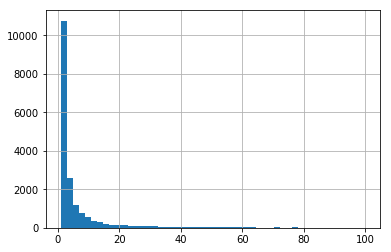

In [36]:
tag_counts[tag_counts <= 100].hist(bins=50)

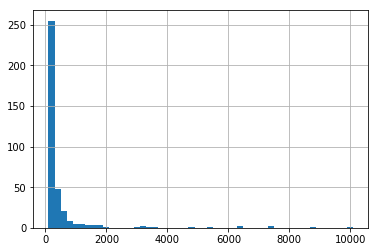

In [37]:
tag_counts[tag_counts > 100].hist(bins=50)

In [38]:
from collections import defaultdict
# import seaborn as sns

tag_counts = defaultdict(int)

for row in tag_posts['_Tag_List']:
    for tag in row:
        tag_counts[tag] += 1

for i in [0, 10, 20, 50, 100, 1000]:
    filtered_tags = list(filter(lambda x: x > i, tag_counts.values()))
    print('There are {:,} tags with more than {:,} count'.format(len(filtered_tags), i))

MIN_TAGS = 50

record_count = len([i for i in filter(lambda x: x > MIN_TAGS, tag_counts.values())])
record_count

There are 18,549 tags with more than 0 count
There are 2,730 tags with more than 10 count
There are 1,589 tags with more than 20 count
There are 709 tags with more than 50 count
There are 367 tags with more than 100 count
There are 33 tags with more than 1,000 count


709

In [39]:
all_tags = set()
for row in tag_posts['_Tag_List']:
    for tag in row:
        if tag_counts[tag] > MIN_TAGS:
            all_tags.add(tag)
print('Total unique tags with {:,} occurrences: {:,}'.format(MIN_TAGS, len(all_tags)))
sorted_all_tags = sorted(all_tags)

tag_to_id = {val:i for i, val in enumerate(sorted_all_tags)}
id_to_tag = {i:val for i, val in enumerate(sorted_all_tags)}

Total unique tags with 50 occurrences: 709


In [40]:
labels = []
tag_list = tag_posts['_Tag_List'].tolist()

# Loop through every post...
for i, tag_set in enumerate(tag_posts['_Tag_List'].tolist()):
    # Then build a record_count element wide list for each tag present
    label_row = []
    for tag in sorted_all_tags:
        if tag in tag_list[i]:
            label_row.append(1)
        else:
            label_row.append(0)
    labels.append(label_row)
    
tag_labels = [id_to_tag[key_id] for key_id in sorted(id_to_tag.keys()) if tag_counts[id_to_tag[key_id]] > MIN_TAGS]

len(labels), len(labels[0]), len(tag_labels)

(98278, 709, 709)

In [41]:
from bs4 import BeautifulSoup

MIN_TEXT_LABELS = 50


def extract_text(x):
    doc = BeautifulSoup(x)
    codes = doc.find_all('code')
    [code.extract() if code else None for code in codes]
    return doc.text

post_text = tag_posts._Body.apply(extract_text)
post_text_words = [x.split() for x in post_text.tolist()]

text_word_counts = defaultdict(int)
all_text_words = set()
for post in post_text_words:
    for word in post:
        text_word_counts[word] += 1
        all_text_words.add(word)

sorted_all_text_words = sorted(all_text_words)
print('All text words: {:,}'.format(len(sorted_all_text_words)))

text_word_to_id = {word:i for i, word in enumerate(sorted_all_text_words)}
text_id_to_word = {i:word for i, word in enumerate(sorted_all_text_words)}


# Take words with > MIN_CODE_LABELS/MIN_TEXT_LABELS (20) instances and build a new set of records and labels/label counts
# encoded_code = []
encoded_text = []
# raw_code_labels = set()
raw_text_labels = set()
# encoded_code_labels = set()
encoded_text_labels = set()
# encoded_code_label_counts = defaultdict(int)
encoded_text_label_counts = defaultdict(int)
# for i, (code, text) in enumerate(zip(post_code_words, post_text_words)):
for i, text in enumerate(post_text_words):    
    encoded_text_row = []
    for word in text:
        if text_word_counts[word] > MIN_TEXT_LABELS:
            raw_text_labels.add(word)
            encoded_text_row.append(text_word_to_id[word])
            encoded_text_labels.add(text_word_to_id[word])
            encoded_text_label_counts[word] += 1
    
    encoded_text.append(encoded_text_row)

# print('Filtered code words: {:,}'.format(len(encoded_code_labels)))
print('Filtered text words: {:,}'.format(len(encoded_text_labels)))

    
# Remove short records that we filtered words
post_ids = defaultdict(bool)
post_id_list = []
filtered_text_words = []
for i, text in enumerate(encoded_text):
    if len(text) < 5:
        pass
    else:
        post_ids[i] = True
        post_id_list.append(i)
        filtered_text_words.append(text)

filtered_df = pd.DataFrame({'text': filtered_text_words}) # , 'code': filtered_code_words})
len(filtered_df.index)

All text words: 359,130
Filtered text words: 8,103


98152

In [71]:
from keras.preprocessing.text import Tokenizer

def extract_text(x):
    doc = BeautifulSoup(x)
    codes = doc.find_all('code')
    [code.extract() if code else None for code in codes]
    return doc.text

post_text = tag_posts._Body.apply(extract_text)

t = Tokenizer(5000, lower=True)
t.fit_on_texts(post_text)
tokenized_text = t.texts_to_matrix(post_text.tolist())
tokenized_text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
post_text.tolist()

['This is what i have.\n\nI need to break that up into individual lines in an array so i can read it like this\n\nHow do i do this in php?\n',
 "Hi this script shows a Google's map in Palo Alto, CA.\nWhen i use it in a simple .html page it works perfectly, but when i include it in a Wordpress page it doesn't show up. \n\nWhat am i missing?\nthanks\n\n",
 "I'm creating an app (personal project) that'll help us schedule and record Nerf tournaments for a group I hang out with. I have  and  models. A tournament can have multiple players.\nI want to be able to check multiple players and choose to delete them from the tournament. The thing is though is that all of my players are rendered in a nested partial. And my  partial has a form already inside of it.\nHere is :\n\nand here is :\n\nI'm familiar with Railscast #52 where he does a simpler example of this, but I can't figure out how to get all of those checked checkboxes in the tournament partial and use those ID's to delete those players 

In [42]:
filtered_df.head(5)

,text
0,"[158683, 257948, 351353, 250844, 238878, 11459..."
1,"[113673, 335962, 314718, 319722, 173250, 11136..."
2,"[114616, 206655, 178223, 180138, 239516, 34454..."
3,"[114590, 349666, 337859, 194758, 258704, 19937..."
4,"[114590, 238863, 173250, 91348, 201789, 351563..."


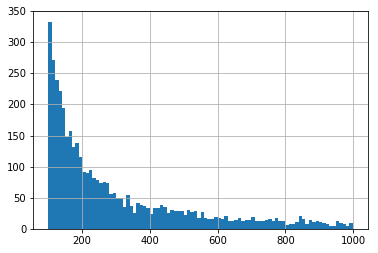

In [43]:
label_counts_s = pd.Series(
    data=[i for i in encoded_text_label_counts.values()],
    index=[i for i in encoded_text_label_counts.keys()]
)
label_counts_s = label_counts_s.sort_values(ascending=False)
label_counts_s[label_counts_s > 100][label_counts_s < 1000].hist(bins=90)

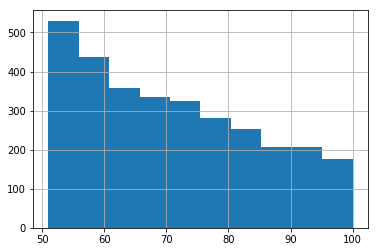

In [44]:
label_counts_s[label_counts_s <= 100].hist(bins=10)

In [24]:
from collections import defaultdict

# Compute a new class label set and label counts that are non-null to match filtered_code_words
new_labels = []
for post_id in post_id_list:
    label_set = labels[post_id]
    new_labels.append(label_set)

# del labels
len(new_labels)

98152

In [45]:
# Validate the posts match the labels
assert(len(filtered_df.index) == len(new_labels))
print('We are left with {:,} example posts'.format(len(filtered_df.index)))

We are left with 98,152 example posts


In [46]:
filtered_df['labels'] = new_labels

# filtered_df['code_sums'] = filtered_df['code'].apply(lambda x: sum(x))
filtered_df['text_sums'] = filtered_df['text'].apply(lambda x: sum(x))
# filtered_df = filtered_df[(filtered_df['code_sums'] > 0) & (filtered_df['text_sums'] > 0)]
filtered_df = filtered_df[filtered_df['text_sums'] > 0]

filtered_df['label_max'] = filtered_df['labels'].apply(lambda x: max(x))
filtered_df = filtered_df[filtered_df['label_max'] > 0]

filtered_df.head()

,text,labels,text_sums,label_max
0,"[158683, 257948, 351353, 250844, 238878, 11459...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7567395,1
1,"[113673, 335962, 314718, 319722, 173250, 11136...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9442183,1
2,"[114616, 206655, 178223, 180138, 239516, 34454...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",32839440,1
3,"[114590, 349666, 337859, 194758, 258704, 19937...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8201194,1
4,"[114590, 238863, 173250, 91348, 201789, 351563...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50822831,1


(93166, 709)


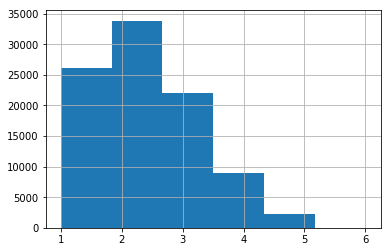

In [47]:
label_ary = np.array(filtered_df['labels'].tolist())
print(label_ary.shape)

label_freq = np.sum(label_ary, axis=1) # / label_ary.shape[1]
pd.Series(label_freq).hist(bins=6)

In [48]:
from sklearn.model_selection import train_test_split

TEST_SPLIT = 0.1

label_mx = np.array(filtered_df['labels'].tolist())
X_train, X_test, y_train, y_test = train_test_split(
    filtered_df,
    label_mx,
    test_size=TEST_SPLIT,
    random_state=34
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83849, 4), (9317, 4), (83849, 709), (9317, 709))

In [49]:
y_train.shape, y_test.shape

((83849, 709), (9317, 709))

In [50]:
from keras.preprocessing.sequence import pad_sequences

MAX_TEXT_LENGTH = 100

padded_text_train = pad_sequences(X_train['text'], MAX_TEXT_LENGTH, padding='post')
padded_text_test  = pad_sequences(X_test['text'], MAX_TEXT_LENGTH, padding='post')

Using TensorFlow backend.


In [64]:
# from keras.models import Sequential
# from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

# MAX_NB_WORDS = len(encoded_labels)
# EMBEDDING_DIM = 50

# model = Sequential()
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(record_count, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

padded_text_train.max()

358970

In [54]:
# padded_code_train.shape[1], 
padded_text_train.shape[0], padded_text_train.shape[1]

(83849, 100)

In [58]:
# padded_code_train.shape, padded_text_train.shape, padded_code_train.dtype, padded_text_train.dtype, \
#     y_train.shape, y_test.shape
padded_text_train.dtype, padded_text_train.shape, padded_text_test.shape, y_train.shape, y_test.shape

(dtype('int32'), (83849, 100), (9317, 100), (83849, 709), (9317, 709))

In [60]:
from keras.layers import Input, concatenate, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from keras.models import Model
from keras.optimizers import Adam

MAX_TEXT_NB_WORDS = 5000
TEXT_EMBEDDING_DIM = 64

# Text model
text_input = Input(shape=(padded_text_train.shape[1],))

text_embedding = Embedding(
    MAX_TEXT_NB_WORDS, 
    TEXT_EMBEDDING_DIM, 
    input_length=padded_text_train.shape[1]
)(text_input)

text_embedding_dropout = Dropout(0.2)(text_embedding)

text_lstm = LSTM(
    100, 
    input_shape=(padded_text_train.shape[1], padded_text_train.shape[1] * TEXT_EMBEDDING_DIM)
)(text_embedding_dropout)

text_lstm_dropout = Dropout(0.2)(text_lstm)

text_dense = Dense(record_count, activation='sigmoid')(text_lstm_dropout)

text_model = Model(
    inputs=text_input, 
    outputs=text_dense
)

from keras import backend as K

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def abs_KL_div(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), None)
    y_pred = K.clip(y_pred, K.epsilon(), None)
    return K.sum(K.abs( (y_true - y_pred) * (K.log(y_true / y_pred))), axis=-1)

text_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[abs_KL_div, 'mae'])

text_model.summary()

# model.compile(
#     loss='binary_crossentropy',
#     optimizer='adam',
#     metrics=[abs_KL_div],
# )

# model.summary()

# for layer in model.layers:
#     print(layer, layer.output_shape)


W0715 14:25:52.391389 140012180617024 deprecation_wrapper.py:118] From /home/rjurney/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 14:25:52.404822 140012180617024 deprecation.py:506] From /home/rjurney/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0715 14:25:52.556024 140012180617024 deprecation_wrapper.py:118] From /home/rjurney/anaconda/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 14:25:52.571004 140012180617024 deprecation.py:323] From /home/rjurney/anaconda/lib/python3.6/site-pac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 709)               71609     
Total params: 457,609
Trainable params: 457,609
Non-trainable params: 0
_________________________________________________________________


In [61]:
from sklearn.utils.class_weight import compute_sample_weight
from keras.callbacks import EarlyStopping

epochs = 1
batch_size = 32

class_weights = np.sum(y_train, axis=0) / y_train.shape[0]

sample_weights = compute_sample_weight('balanced', y_train)

history = text_model.fit(
    padded_text_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[
        EarlyStopping(monitor='loss', patience=1, min_delta=0.001),
        EarlyStopping(monitor='val_loss', patience=1, min_delta=0.001),
    ],
)

Train on 75464 samples, validate on 8385 samples
Epoch 1/1


InvalidArgumentError: indices[22,0] = 217364 is not in [0, 5000)
	 [[{{node embedding_1/embedding_lookup}}]]

In [ ]:
# from sklearn.utils.class_weight import compute_sample_weight
# from keras.callbacks import EarlyStopping

# epochs = 4
# batch_size = 256

# # class_ratios = np.sum(y_train, axis=0) / y_train.shape[0]

# sample_weights = compute_sample_weight('balanced', y_train)

# history = model.fit(
#     [padded_code_train, padded_text_train],
#     y_train,
#     epochs=epochs,
#     batch_size=batch_size,
#     validation_split=0.1,
#     callbacks=[
#         EarlyStopping(monitor='val_loss', patience=1, min_delta=0.001),
#     ],
#     sample_weight=sample_weights
# )

In [ ]:
# y_train.max(axis=1).min()

In [ ]:
accr = text_model.evaluate(padded_text_test, y_test, sample_weight=sample_weights)
accr# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
# %matplotlib inline

# import matplotlib.pyplot as plt

# print(history.history)
# # summarize history for accuracy
# plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_abs_KL_div'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
from sklearn.metrics import hamming_loss, jaccard_score

import keras.backend as K
import tensorflow as tf

y_pred = text_model.predict(padded_text_test)

sess = tf.Session()
with sess.as_default():
    for cutoff in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8]:
        y_pred_bin = K.greater(y_pred, 0.01).eval()
        print('Cutoff: {:,}'.format(cutoff))
        print('Hamming loss: {:,}'.format(
            hamming_loss(y_test, y_pred_bin)
        ))
        for j_type in ['micro', 'macro', 'weighted']:
            print('Jaccard {} score: {:,}'.format(
                j_type,
                jaccard_score(y_test, y_pred_bin, average=j_type)
            ))

In [ ]:
y_pred.dtype

In [ ]:
    y_true = K.variable(y_test)
    y_pred = K.variable(y_pred)

    # Count positive samples.
    c1 = K.sum(K.cast(K.greater(K.clip(y_true * y_pred, 0, 1), 0.1), 'float32'))
    c2 = K.sum(K.cast(K.greater(K.clip(y_pred, 0, 1), 0.1), 'float32'))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)

